## Задание №5

У Юры есть датасет, содержащий 15 объектов и 2 признака, причём точки, соответствующие объектам, являются вершинами правильного 15-угольника. Юра тестирует на этом датасете алгоритм k-means (количество кластеров $k=3$, стандартная евклидова метрика на плоскости), состоящий из следующих шагов. Из точек датасета случайно выбираются 3 точки $C1$, $C2$, $C3$ – изначальные центры кластеров.

Пока разбиение на кластеры не стабилизируется:

- **(E-шаг)** Каждая точка $A$ датасета относится к кластеру, который соответствует ближайшему центру: значение кластера равно значению $k$, для которого величина $||A − C_k||$ минимальна.
- **(M-шаг)** Центром $C_k$ каждого кластера назначается центр масс точек данного кластера.

Юра не терпит неопределенностей и не хочет долго ждать, поэтому ему хочется, чтобы выполнялось два условия:

1. При первом выполнении E-шага каждая точка однозначно отнесётся к ближайшему центру: ни для одной точки $A$ из датасета не будет двух центров кластеров на одном и том же минимальном расстоянии от $A$.
2. Кластеризация после второго выполнение E-шага полностью совпадёт с кластеризацией после первого выполнения Е-шага, и алгоритм завершится.

**Вопрос:** Найдите вероятность того, что при случайной инициализации центров кластеров эти два условия будут выполнены.

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from itertools import combinations
from scipy.spatial import distance_matrix
from sklearn.metrics import pairwise_distances_argmin
from math import pi
from fractions import Fraction

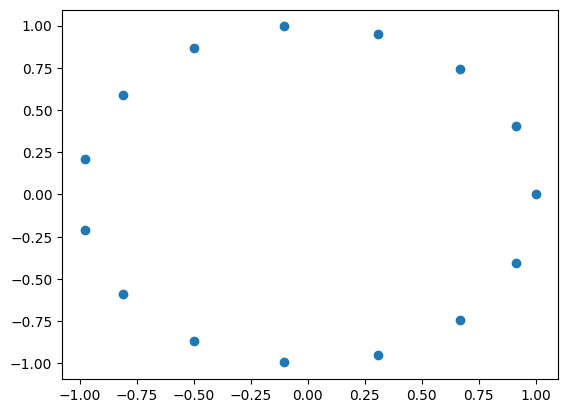

In [6]:
def polygon_to_circle_points(indices):
    angles = (2 * pi / 15) * indices
    return np.column_stack((np.cos(angles), np.sin(angles)))

indices = range(15)
points = polygon_to_circle_points(np.array(indices, dtype=np.float64))
plt.scatter(x=points[:, 0], y=points[:, 1])
plt.show()

In [8]:
total_combinations = 0
valid_combinations = []

# Итерация по всем комбинациям 3 точек в качестве потенциальных центров кластеров
for centers in combinations(indices, 3):
    total_combinations += 1
    center_coords = points[list(centers), :]
    distances = distance_matrix(points, center_coords)
    clusters = np.argmin(distances, axis=1)

    # Первое условие: каждая точка однозначно относится к ближайшему центру
    if any(np.isclose(distances[i, clusters[i]], 
                      np.min(distances[i, clusters[i] != np.arange(3)])) 
           for i in indices):
        continue

    # Второе условие: кластеризация остается неизменной после одного E-шага
    new_center_coords = np.array([points[clusters == i].mean(0) for i in range(3)])
    new_clusters = pairwise_distances_argmin(points, new_center_coords)
    if np.array_equal(new_clusters, clusters):
        valid_combinations.append(centers)

# Расчет вероятности
probability = Fraction(len(valid_combinations), total_combinations)
print(probability)

1/13
